In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import tensorflow as tf
from tensorflow.python.framework import ops
import math
import glob
import imageio
import pathlib
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

from google.colab import drive
drive.mount('/content/drive')

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_data_dir = '/content/drive/My Drive/dataset/dataset_M01'
test_data_dir = '/content/drive/My Drive/dataset/testdata'
validation_data_dir = './dataset/'
nb_train_samples =400 
nb_validation_samples = 100
epochs = 10
batch_size = 16
img_width, img_height = 500, 500

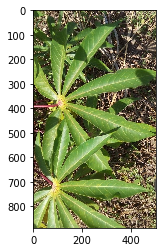

In [0]:
  from imutils import paths
#อิมพอร์ต paths จาก imutils
image_paths = list(paths.list_images(train_data_dir))
#อ่านรูปาภาพสัตว์ทั้งหมดจากโฟลเดอร์
image = cv2.imread(image_paths[10])
#ลองใช้ cv2 อ่านรูปขึ้นมาสักรูป
image = cv2.imread(image_paths[10])
#ลองใช้ cv2 อ่านรูปขึ้นมาสักรูป
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#หลังจากอ่านมาเสร็จแล้ว เราต้องแปลงสีก่อนเพราะ cv2 นั้นเมื่ออ่านรูปเข้ามา จะมีค่าพื้นฐานของสีเป็น BGR ซึ่งสีที่เราใช้ๆกันอยู่อย่างคุ้นตาคือ RGB เพราะฉะนั้นเราต้องแปลงก่อน
plt.figure()
#เราใช้ pyplot ในการโชว์รูปขึ้นมา แต่ก่อนที่เราจะโชว์ขึ้นมาได้เราต้องสร้างตัว figure ขึ้นมาเสียก่อน เหมือนกับการสร้างหน้าต่างโปรแกรมขึ้นมาเพื่อที่จะให้เอารูปที่จะโชว์ไปแปะ
plt.imshow(new_image)
#ใช้ฟังก์ชั่น imshow ในการโชว์รูปออกมา

In [0]:
print(image_paths[10].split('/')[0])

In [0]:
import random

random.shuffle(image_paths)

data = []
labels = []

for image_path in image_paths:
    image = cv2.imread(image_path)
    image = cv2.resize(image, (32, 32))
    labels.append(image_path.split('/')[6])
    data.append(image)

In [0]:
print(image_paths[10].split('-')[1])

cbsd


In [0]:
print(image_paths)
print(data)
print(labels)

In [0]:
from sklearn.preprocessing import LabelBinarizer
data = np.array(data)
lb = LabelBinarizer()
data = data/255.0

#labels = np.array(labels)
#labels = lb.fit_transform(labels)
print(labels)

In [0]:
for i in range(len(labels)) :
    if(labels[i] == 'health_train'):
        labels[i] = [1,0]
    else:
        labels[i] = [0,1]
    print(labels[i])

In [0]:
labels = np.array(labels)
labels = lb.fit_transform(labels)
print(labels)
print(len(labels))
data = np.array(data)
labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [0]:
data = np.array(data)
labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)


In [0]:

from keras import backend
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers.core import Dense, Flatten
from keras import optimizers
#อิมพอร์ตพวกของต่างๆที่จะต้องใช้จาก keras
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)

#เรียกใช้ฟังก์ชั่น train_test_split เพื่อทำการสร้างข้อมูลเทรนกับเทส
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), input_shape=(32, 32 ,3), activation='relu', padding='same'))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(32, (3, 3), padding='same'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Dense(256, activation="relu"))
model_2.add(Flatten())
model_2.add(Dense(2, activation='softmax'))
optimizer = optimizers.adam(lr=0.00001)
model_2.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=["accuracy"])
model_2.summary()




#M set 1
#model_2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#model_2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#model_2.add(MaxPooling2D(pool_size=(2,2)))
#model_2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#model_2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#model_2.add(MaxPooling2D(pool_size=(2,2)))
#model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#model_2.add(Conv2D(32, (3, 3), padding='same'))
#model_2.add(Conv2D(32, (3, 3)))
#model_2.add(Flatten())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [0]:
mhis = model_2.fit(X_train, y_train, epochs=500, validation_split=0.2)

Train on 768 samples, validate on 193 samples
Epoch 1/500



768/768 [==============================] - 13s 17ms/step - loss: 0.6927 - acc: 0.5352 - val_loss: 0.6937 - val_acc: 0.4508
Epoch 2/500
768/768 [==============================] - 12s 15ms/step - loss: 0.6917 - acc: 0.5286 - val_loss: 0.6938 - val_acc: 0.4508
Epoch 3/500
768/768 [==============================] - 12s 15ms/step - loss: 0.6908 - acc: 0.5286 - val_loss: 0.6944 - val_acc: 0.4508
Epoch 4/500
768/768 [==============================] - 12s 15ms/step - loss: 0.6899 - acc: 0.5286 - val_loss: 0.6945 - val_acc: 0.4508
Epoch 5/500
768/768 [==============================] - 11s 15ms/step - loss: 0.6886 - acc: 0.5286 - val_loss: 0.6935 - val_acc: 0.4508
Epoch 6/500
768/768 [==============================] - 11s 15ms/step - loss: 0.6870 - acc: 0.5404 - val_loss: 0.6925 - val_acc: 0.4560
Epoch 7/500
768/768 [==============================] - 12s 15ms/step - loss: 0.6853 - acc: 0.5443 - val_loss: 0.6907 - val_acc: 0.4715
Epoch 8/500
768/768 [==============================] - 12s 15ms/ste

In [0]:
y_pred = model_2.predict(X_test)
target_names = ['health_train','not_health_train']
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=target_names))
preds = model_2.evaluate(x=X_test, y=y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
import sklearn.metrics as metrics
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)


0.9128630705394191
                  precision    recall  f1-score   support

    health_train       0.91      0.89      0.90       105
not_health_train       0.91      0.93      0.92       136

        accuracy                           0.91       241
       macro avg       0.91      0.91      0.91       241
    weighted avg       0.91      0.91      0.91       241

241/241 [==============================] - 1s 3ms/step

Loss = 0.30791832797260205
Test Accuracy = 0.9128630715287078
[[ 93  12]
 [  9 127]]


In [0]:
img =  X_test[10]
cv2.imwrite('color_img.jpg', img)
plt.figure()
#เราใช้ pyplot ในการโชว์รูปขึ้นมา แต่ก่อนที่เราจะโชว์ขึ้นมาได้เราต้องสร้างตัว figure ขึ้นมาเสียก่อน เหมือนกับการสร้างหน้าต่างโปรแกรมขึ้นมาเพื่อที่จะให้เอารูปที่จะโชว์ไปแปะ
plt.imshow(img)


In [0]:
print(len(y_pred))

In [0]:
print(y_test)


In [0]:
c = 0
y_test2 = y_test
for i in y_test :
  if(i[0] > 0.5 and i[1] < 0.5):
    #print('health_train')
    y_test2[c] = [1,0]
  else:
    #print('not_health_train')
    y_test2[c] = [0,1]
  c +=1
print(c)
print(y_test2)



In [0]:
checkTrue = 0
checkFalse = 0
c = 0
for i in y_predCSV:
  if(y_predCSV[c][0] == y_test[c][0] and y_predCSV[c][1] == y_test[c][1] ):
    checkTrue +=1
  else:
    checkFalse +=1
print(checkTrue / len(y_pred))
print(checkFalse / len(y_pred))

In [0]:
from keras.models import load_model
from keras import optimizers
modeltest = load_model('/content/drive/My Drive/dataset/dataModel/FirstModel.h5')
optimizer = optimizers.adam(lr=0.00001)
modeltest.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=["accuracy"])

In [0]:
#main project

test_part = image_paths[900:1200]
print(len(test_part))
test_data = data[900:1200]
print(len(test_data))
test_labels = labels[900:1200]
print(len(test_labels))

300
300
300


In [0]:
print(test_labels)

In [0]:
#test_data = np.array(test_data)
test_y_pred = modeltest.predict(test_data)
target_names = ['health_train','not_health_train']
from sklearn.metrics import accuracy_score, classification_report
test_y_pred = np.array(test_y_pred)
#test_labels = np.array(test_labels)
print(accuracy_score(test_labels.argmax(axis=1), test_y_pred.argmax(axis=1)))


0.9033333333333333


In [0]:
# 0 = health_train
# 1 = not_health_train
inputData = test_labels.argmax(axis=1)
outPutData = test_y_pred.argmax(axis=1)
print(test_y_pred.argmax(axis=1))
print(test_labels.argmax(axis=1))


In [0]:
import sklearn.metrics as metrics
matrix = metrics.confusion_matrix(test_labels.argmax(axis=1), test_y_pred.argmax(axis=1))
print(classification_report(test_labels.argmax(axis=1), test_y_pred.argmax(axis=1), target_names=target_names))
print(matrix)

                  precision    recall  f1-score   support

    health_train       0.90      0.91      0.91       155
not_health_train       0.90      0.90      0.90       145

        accuracy                           0.90       300
       macro avg       0.90      0.90      0.90       300
    weighted avg       0.90      0.90      0.90       300

[[141  14]
 [ 15 130]]


In [0]:
print(test_part[10].split('-')[1])

In [0]:
c = 0
checkH = 0
checkNH = 0
for imgs in test_part : 
  name = imgs.split('-')[1]
  image = cv2.imread(imgs)
  cv2.imwrite('/content/drive/My Drive/dataset/outputM1/all/{}_{}.png'.format(c,name),image)
  if(outPutData[c] == 1):
    
    if(imgs.split('-')[1] != 'cbsd'):
      name = "not_cbsd"
    image = cv2.imread(imgs)
    cv2.imwrite('/content/drive/My Drive/dataset/outputM1/not_health/{}_{} .png'.format(checkNH,name),image)
    checkNH += 1
  else:
    image = cv2.imread(imgs)
    cv2.imwrite('/content/drive/My Drive/dataset/outputM1/health/{}_{}.png'.format(checkH,name),image)
    checkH += 1
  c += 1
  


In [0]:
print(checkH)
print(checkNH)

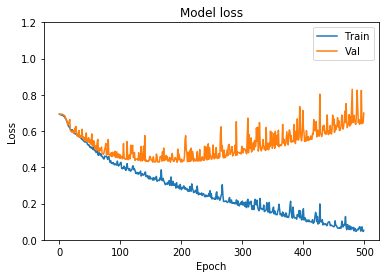

In [0]:
plt.plot(mhis.history['loss'])
plt.plot(mhis.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

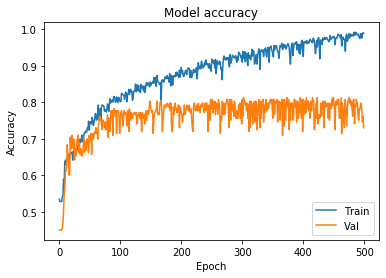

In [0]:
plt.plot(mhis.history['acc'])
plt.plot(mhis.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [0]:
model_2.save('FirstModel.h5')
from google.colab import files
files.download("FirstModel.h5")

In [0]:
!dir